# 6.4 - Supervised Machine Learning - Regression

### This script contains the following points:

* 1 - Import Data & Libraries
* 2 - Data Wrangling
    * I) Data Consistency
    * II) Duplicates
    * III) Extreme Values
* 3 - Hypotheses:
     * A) As a person ages, he/she will have to pay for more expensive insurance.Data Preparation for Regression Analysis
         * I) Data Preparation for Regression Analysis
         * II) Regression Analysis
         * III) Modification of the Model
     * B) The higher the body mass index level, the higher the cost per person.
         * I) Data Preparation for Regression Analysis
         * II) Regression Analysis
* 4 - Final Conclusions
* 5 - Exporting Data

---

## 1. Import Data & Libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Define path

path = r'/Users/juanigalvalisi/Desktop/Data Analyst/Achievement 6/'

In [5]:
# Import .PKL

df_medical_costs = pd.read_pickle(os.path.join(path, 'medical_cost_categories.pkl'))

In [6]:
# Check the output of df_medical_costs

df_medical_costs.head()

,Age,Sex,Body_mass_index,Children,Smoker,Region,Charges,Age_range,Cost_category
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Middle cost
1,18,male,33.770,1,no,southeast,1725.55230,Young,Low cost
2,28,male,33.000,3,no,southeast,4449.46200,Young,Low cost
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Middle cost
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Low cost


In [7]:
# Check the output of df_medical_costs

df_medical_costs.shape

(1337, 9)

In [8]:
# Check the output of df_medical_costs

df_medical_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1337 non-null   int64  
 1   Sex              1337 non-null   object 
 2   Body_mass_index  1337 non-null   float64
 3   Children         1337 non-null   int64  
 4   Smoker           1337 non-null   object 
 5   Region           1337 non-null   object 
 6   Charges          1337 non-null   float64
 7   Age_range        1337 non-null   object 
 8   Cost_category    1337 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 104.5+ KB


---

## 2. Data Wrangling & Cleaning

### I) Data Consistency

In [9]:
# Check for missing values

df_medical_costs.isnull().sum()

Age                0
Sex                0
Body_mass_index    0
Children           0
Smoker             0
Region             0
Charges            0
Age_range          0
Cost_category      0
dtype: int64

### II) Duplicates

In [11]:
dups = df_medical_costs.duplicated()

In [12]:
dups.shape # no dups

(1337,)

### III) Extreme Values

<AxesSubplot:xlabel='Charges', ylabel='Count'>

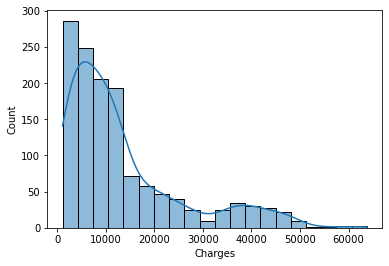

In [13]:
sns.histplot(df_medical_costs['Charges'], bins=20, kde = True) # shows extreme values for 'Charges'

<AxesSubplot:xlabel='Body_mass_index', ylabel='Count'>

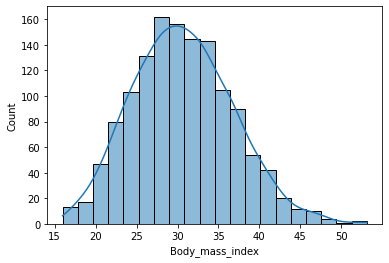

In [14]:
sns.histplot(df_medical_costs['Body_mass_index'], bins=20, kde = True) # shows extreme values for 'Body mass index'

<AxesSubplot:xlabel='Children', ylabel='Count'>

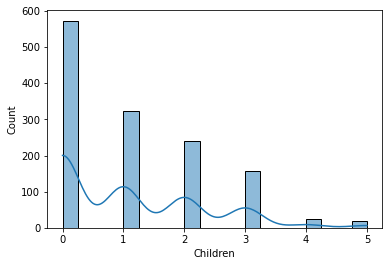

In [15]:
sns.histplot(df_medical_costs['Children'], bins=20, kde = True) # shows extreme values for 'Children'

---

## 3. Hypotheses

* A) As a person ages, he/she will have to pay for more expensive insurance.
* B) The higher the body mass index level, the higher the cost per person.

## 3. A) As a person ages, he/she will have to pay for more expensive insurance.

### I) Data Preparation for Regression Analysis

#### Age vs. Charges

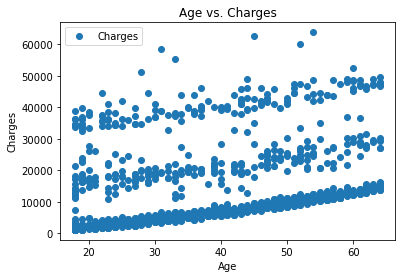

In [16]:
# Scatterplot to investigate how Age and Charges variables plot against each other.

df_medical_costs.plot(x = 'Age', y='Charges',style='o')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_medical_costs['Age'].values.reshape(-1,1)
y = df_medical_costs['Charges'].values.reshape(-1,1)

In [18]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]])

In [19]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### II) Regression Analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # Regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

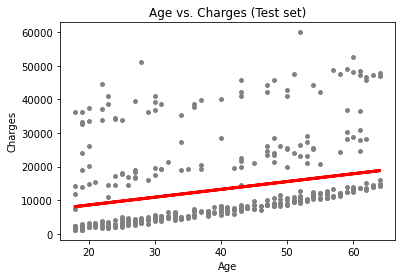

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs. Charges (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367427


In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,8086.242979
1,8547.69130,14843.935802
2,9290.13950,15309.983583
3,32548.34050,8319.266870
4,9644.25250,15776.031364
5,2680.94930,9950.434103
6,2198.18985,8086.242979
7,1241.56500,8319.266870
8,2710.82855,8319.266870
9,12235.83920,17407.198597


### III) Partial Interpretation

The line does not fit the data properly. It is clear that the data points are far from the trend line, which indicates that it seems there are not a linear relationship between both variables. In detail, the Mean squared error is huge regarding the data we have and the R2 score is only 0,10, which indicates that this relationship has a poor fit. It seems that we are not able to say that as a person ages, he/she will have to pay for more expensive insurance.

### IV) Compare how the regression fits the training set

In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  128318059.75747488
R2 score:  0.07682646420531714


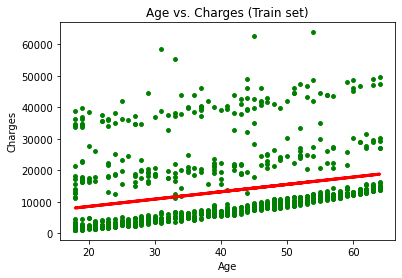

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs. Charges (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

#### Compare the predicted y values with the actual y values in a dataframe.

The models' outcome on the training set is similar to that of the one we have in the test set. This confirms what we supposed earlier: the model is not applicable. One possible option to see if a person ages he/she will have to pay for more expensive insurance is to separate directly the elderly population to see if they are more likely to pay more.

### III) Modification of the Model

#### I) Create a new data set

In [32]:
# Modification of the model based on people 50 years and above

df_medical_costs_2 = df_medical_costs[df_medical_costs['Age']>=50]

In [33]:
df_medical_costs_2.shape

(385, 9)

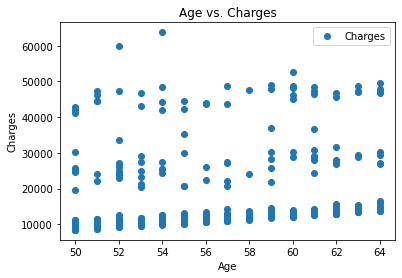

In [34]:
# Scatterplot to investigate how Age and Charges variables plot against each other.

df_medical_costs_2.plot(x = 'Age', y='Charges',style='o')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_medical_costs_2['Age'].values.reshape(-1,1)
y = df_medical_costs_2['Charges'].values.reshape(-1,1)

In [36]:
X

array([[60],
       [62],
       [56],
       [52],
       [56],
       [60],
       [59],
       [63],
       [55],
       [63],
       [62],
       [60],
       [55],
       [60],
       [58],
       [58],
       [53],
       [64],
       [61],
       [53],
       [58],
       [57],
       [57],
       [56],
       [55],
       [53],
       [59],
       [64],
       [54],
       [55],
       [56],
       [61],
       [63],
       [54],
       [55],
       [52],
       [60],
       [58],
       [52],
       [59],
       [61],
       [53],
       [54],
       [51],
       [53],
       [50],
       [54],
       [63],
       [63],
       [54],
       [58],
       [61],
       [56],
       [51],
       [64],
       [60],
       [59],
       [63],
       [53],
       [53],
       [55],
       [58],
       [59],
       [59],
       [55],
       [63],
       [54],
       [60],
       [63],
       [54],
       [50],
       [55],
       [56],
       [51],
       [58],
       [52],
       [53],

In [37]:
y

array([[28923.13692],
       [27808.7251 ],
       [11090.7178 ],
       [10797.3362 ],
       [10602.385  ],
       [13228.84695],
       [14001.1338 ],
       [14451.83515],
       [12268.63225],
       [13770.0979 ],
       [15612.19335],
       [48173.361  ],
       [20630.28351],
       [12629.8967 ],
       [47496.49445],
       [13607.36875],
       [23244.7902 ],
       [30166.61817],
       [14235.072  ],
       [11741.726  ],
       [11946.6259 ],
       [11356.6609 ],
       [43578.9394 ],
       [11073.176  ],
       [11082.5772 ],
       [10942.13205],
       [30184.9367 ],
       [47291.055  ],
       [12105.32   ],
       [10226.2842 ],
       [22412.6485 ],
       [30942.1918 ],
       [47055.5321 ],
       [10825.2537 ],
       [11881.358  ],
       [11488.31695],
       [30259.99556],
       [11381.3254 ],
       [ 9634.538  ],
       [12815.44495],
       [13616.3586 ],
       [11163.568  ],
       [27322.73386],
       [ 9877.6077 ],
       [10959.6947 ],
       [19

In [38]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### II) Regression Analysis

In [39]:
# Create a regression object.

regression = LinearRegression()  # Regression object, which will be fit onto the training set.

In [40]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

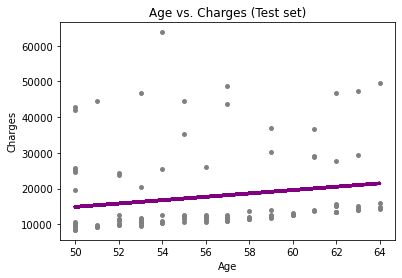

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =3)
plot_test.title('Age vs. Charges (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[470.15810593]]
Mean squared error:  131294796.81572613
R2 score:  0.004897023342933182


In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,11729.67950,16303.091814
1,15019.76005,20534.514767
2,12643.37780,17713.566131
3,12044.34200,17713.566131
4,11244.37690,16303.091814
5,36580.28216,20064.356661
6,14394.55790,21474.830979
7,11165.41765,17713.566131
8,13974.45555,21004.672873
9,29523.16560,21004.672873


### III) Compare how the regression fits the training set

In [46]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[470.15810593]]
Mean squared error:  132091920.5967189
R2 score:  0.029858150656020488


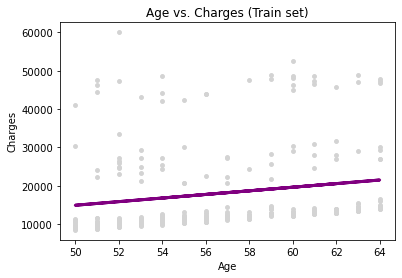

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='lightgray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='purple', linewidth =3)
plot_test.title('Age vs. Charges (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

### IV) Interpretation of the new model

The changes added to the old model (considering the whole data set) do not affect the past results. Even more, this new data set shows less relationship between both variables considering the R2 score. In this sense, age is not a good determinant of the ultimate charges a person has individually.

---

## 3. B) The higher the body mass index level, the higher the cost per person.

### I) Data Preparation for Regression Analysis

#### Body mass index vs. Charges

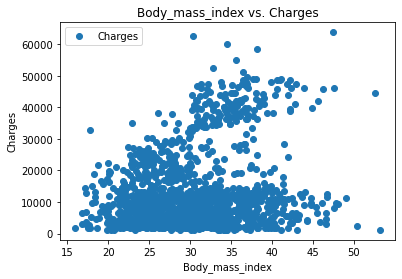

In [50]:
# Scatterplot to investigate how Age and Charges variables plot against each other.

df_medical_costs.plot(x = 'Body_mass_index', y='Charges',style='o')
plt.title('Body_mass_index vs. Charges')
plt.xlabel('Body_mass_index')
plt.ylabel('Charges')
plt.show()

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_medical_costs['Body_mass_index'].values.reshape(-1,1)
y = df_medical_costs['Charges'].values.reshape(-1,1)

In [52]:
X

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [53]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [54]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### II) Regression Analysis

In [56]:
# Create a regression object.

regression = LinearRegression()  # Regression object, which will be fit onto the training set.

In [57]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

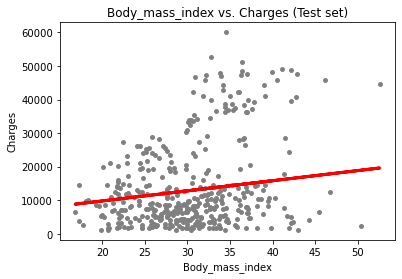

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Body_mass_index vs. Charges (Test set)')
plot_test.xlabel('Body_mass_index')
plot_test.ylabel('Charges')
plot_test.show()

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  154131658.7511644
R2 score:  0.05879287466812988


In [62]:
y_predicted

array([[15772.62039644],
       [12625.19918748],
       [13221.55267971],
       [12890.24518403],
       [ 9215.74386831],
       [ 9101.29218798],
       [11705.06791539],
       [ 9742.82397507],
       [11533.3903949 ],
       [14766.6503641 ],
       [13155.29118057],
       [11929.45344656],
       [13250.16559979],
       [12757.72218576],
       [11580.07463293],
       [18953.17235496],
       [11876.74543588],
       [13564.90772068],
       [ 8843.77590725],
       [13707.97232109],
       [13221.55267971],
       [12423.40280375],
       [12935.42347889],
       [13221.55267971],
       [13950.4291702 ],
       [15024.16664484],
       [ 8986.84050766],
       [13387.20642755],
       [11531.88445174],
       [14509.13408337],
       [12420.39091743],
       [16700.28138434],
       [10435.55782968],
       [15013.6250427 ],
       [ 9959.67979043],
       [13817.90617193],
       [15275.65915292],
       [14742.55527351],
       [ 9673.55058961],
       [13808.87051296],


In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,15772.620396
1,8547.69130,12625.199187
2,9290.13950,13221.552680
3,32548.34050,12890.245184
4,9644.25250,9215.743868
5,2680.94930,9101.292188
6,2198.18985,11705.067915
7,1241.56500,9742.823975
8,2710.82855,11533.390395
9,12235.83920,14766.650364


### III) Partial Interpretation

Following the summary results we got, we say that we have a positive relationship, extremely high MSE and a low R2 square. It seems that we are not able to say that the higher the body mass index level, the higher the cost per person.

### IV) Compare how the regression fits the training set

In [64]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [65]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [66]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  135599557.42526153
R2 score:  0.02444033897433817


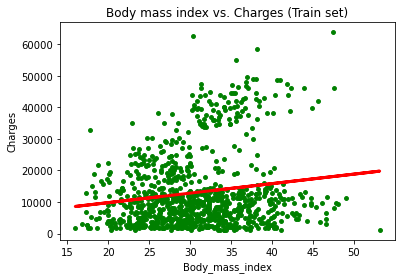

In [67]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Body mass index vs. Charges (Train set)')
plot_test.xlabel('Body_mass_index')
plot_test.ylabel('Charges')
plot_test.show()

#### Compare the predicted y values with the actual y values in a dataframe.

The models' outcome on the training set is similar to that of the one we have in the test set. Even more, the data points are more separated here than in the other set. This confirms that the model is not applicable either.

---

# 4. Final Conclusions

We are not able to affirm that age or body mass index are determinant when establishing charges to pay pro person. Even changing the model to specifying only in ederly people did not work either. Is possible that we need to have more data points in order to make better assumpions since the data set we got discriminating by ederly people was not enough. In fact, there are other factors that could be considered in establishing the total insurance charges for each person.

---

# 5.  Exporting Data

In [68]:
# Export df_medical_costs as .pkl

df_medical_costs.to_pickle(os.path.join(path, 'medical_costs_regresion.pkl'))